Training AutoEncoder

In [1]:
from models import Encoder, Decoder, count_parameters, VGGLoss, ZeroMeanUnitStdLoss
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# CREATE DATASET AND DATALOADER
image_file = "data/mnist_tensor3.pth"
image_tensor = torch.load(image_file)
dataset = TensorDataset(image_tensor)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)
print(image_tensor.shape)

# CREATING MODULES
device = torch.device('cuda')
enc = Encoder(3, 3, 64, 2).to(device)
dec = Decoder(3, 3, 64, 2).to(device)
count_parameters(enc)
count_parameters(dec)

# TRAINING HYPERPARAMETERS
cri0 = ZeroMeanUnitStdLoss()
cri1 = VGGLoss(dev=device)
cri2 = nn.MSELoss()
lr = 2e-4
params = list(enc.parameters()) + list(dec.parameters())
optimizer = torch.optim.AdamW(params, lr=lr)


# TRAINING LOOP 
num_epochs = 3 
for epoch in range(num_epochs):
    total_loss = 0.0 

    for tens, in tqdm(dataloader): 
        x = tens.to(device)
        z = enc(x)
        y = dec(z)

        loss0 = cri0(z)
        loss1 = cri1(y,x)
        loss2 = cri2(y,x)

        loss = (0.1*loss1 + 0.9*loss2 + loss0)/2
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    
    print(f"Epoch {epoch} Loss: {total_loss}")
    # torch.save(enc, "enc.pth"), torch.save(dec, "dec.pth")


torch.Size([70000, 3, 28, 28])
Total trainable parameters: 432,899
Total trainable parameters: 294,659


c:\Users\Andre\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Andre\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
 13%|█▎        | 36/274 [00:05<00:34,  6.98it/s]


KeyboardInterrupt: 

Testing AutoEncoder

torch.Size([16, 3, 28, 28]) torch.Size([16, 3, 14, 14]) torch.Size([16, 3, 28, 28])
tensor([ 0.0413,  0.0007,  0.1112,  0.0109, -0.0105,  0.0226, -0.0485, -0.0230,
        -0.0148,  0.0046, -0.0513,  0.0563,  0.0110, -0.0235, -0.0082,  0.0144],
       device='cuda:0', grad_fn=<MeanBackward1>)
tensor([1.0652, 0.9241, 1.0649, 0.8477, 1.0078, 1.0727, 0.7146, 0.9135, 0.6596,
        1.0503, 0.8805, 1.2714, 0.9267, 0.9933, 0.6129, 1.0440],
       device='cuda:0', grad_fn=<StdBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.58417743..3.0007799].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.615827..3.0167427].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.57353747..2.9846778].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5283145..3.028034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5964088..3.0015821].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60460037..2.9612715].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.50134

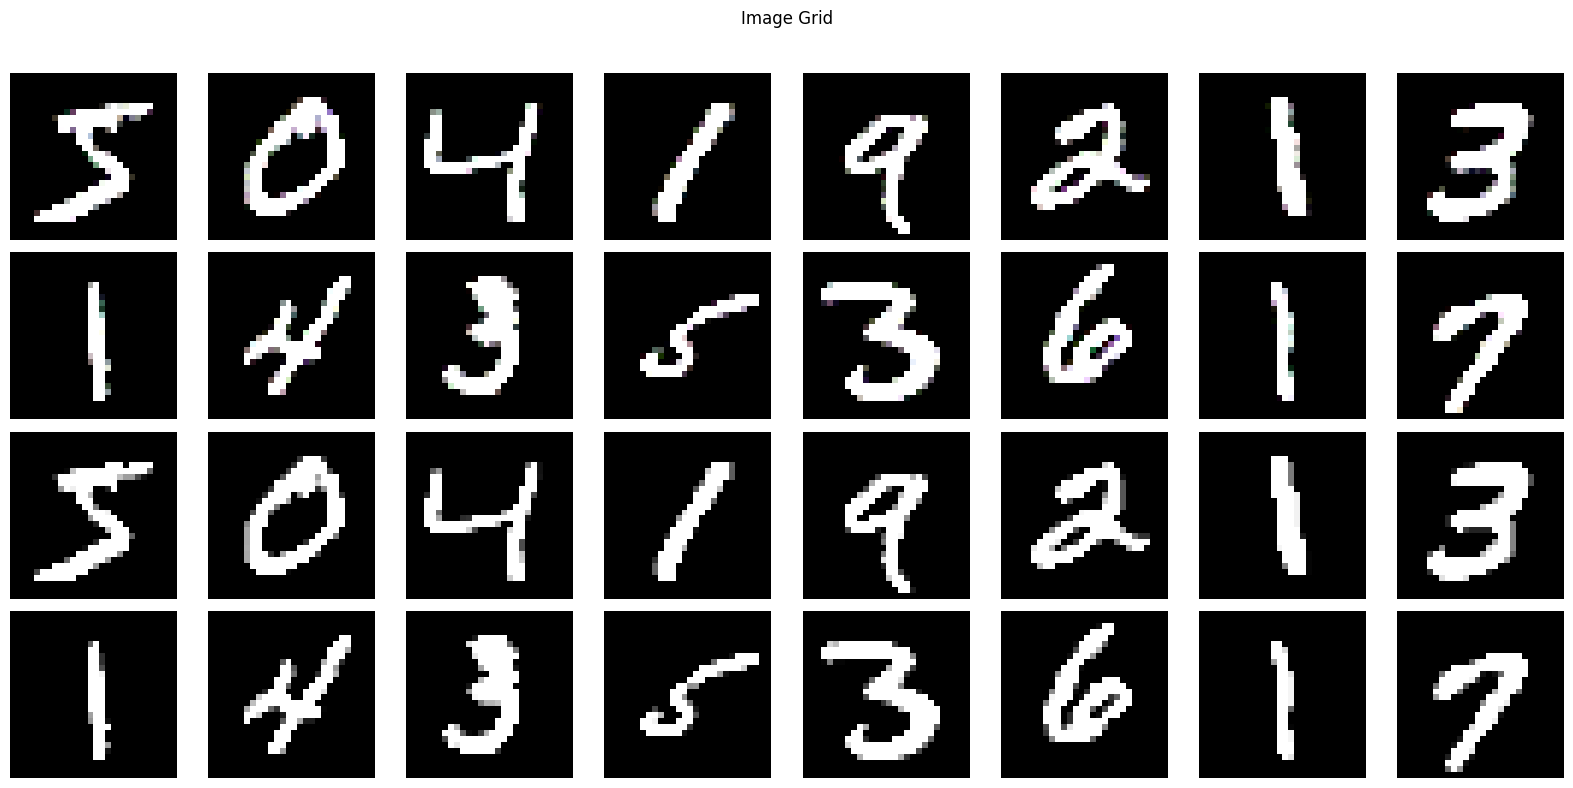

In [2]:
import torch
from utils import plot_image_grid

image_file = "data/mnist_tensor3.pth"
image_tensor = torch.load(image_file)

bs = 16
X = image_tensor[:bs].cuda()

enc = torch.load("model_collection/enczmuv.pth", weights_only=False)
dec = torch.load("model_collection/deczmuv.pth", weights_only=False)
enc.eval(), dec.eval()

z = enc(X)
Y = dec(z)

print(X.shape, z.shape, Y.shape)
print(z.mean(dim=(1, 2, 3)))
print(z.std(dim=(1, 2, 3)))
plot_image_grid(torch.concat([Y,X]))